In [142]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [143]:
df=pd.read_excel('/content/online_retail_II.xlsx' , sheet_name= 'Year 2009-2010')

In [144]:
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [145]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525461 entries, 0 to 525460
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      525461 non-null  object        
 1   StockCode    525461 non-null  object        
 2   Description  522533 non-null  object        
 3   Quantity     525461 non-null  int64         
 4   InvoiceDate  525461 non-null  datetime64[ns]
 5   Price        525461 non-null  float64       
 6   Customer ID  417534 non-null  float64       
 7   Country      525461 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 32.1+ MB


In [146]:
df= df.dropna(subset=['Customer ID'])

In [147]:
df.duplicated().sum()

np.int64(6771)

In [148]:
df.drop_duplicates(inplace=True)

In [149]:
df.duplicated().sum()

np.int64(0)

In [150]:
df=df[(df['Quantity']>0) & (df['Price']>0)]

In [151]:
df['TotalPrice'] = df['Quantity'] * df['Price']


In [152]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])


In [153]:
df['InvoiceMonth'] = df['InvoiceDate'].dt.to_period('M')


In [154]:
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,TotalPrice,InvoiceMonth
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,83.4,2009-12
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0,2009-12
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0,2009-12
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,100.8,2009-12
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,30.0,2009-12


In [155]:
fdate = df['InvoiceDate'].max() + pd.Timedelta(days=1)

customer_df = df.groupby('Customer ID').agg({
    'InvoiceDate': lambda x: (fdate - x.max()).days,  # Recency
    'Invoice': 'nunique',  # Frequency
    'TotalPrice': 'sum'  # Monetary
}).reset_index()

customer_df.columns = ['CustomerID', 'Recency', 'Frequency', 'Monetary']
customer_df.tail()

,CustomerID,Recency,Frequency,Monetary
4307,18283.0,18,6,619.37
4308,18284.0,67,1,461.68
4309,18285.0,296,1,427.00
4310,18286.0,112,2,1296.43
4311,18287.0,18,4,2345.71


In [156]:
# Remove top 1% outliers
customer_df = customer_df[
    (customer_df['Monetary'] < customer_df['Monetary'].quantile(0.99)) &
    (customer_df['Frequency'] < customer_df['Frequency'].quantile(0.99)) &
    (customer_df['Recency'] < customer_df['Recency'].quantile(0.99))
]

In [157]:
import plotly.express as px

fig1 = px.histogram(customer_df, x='Recency', nbins=30, title='Recency Distribution', color_discrete_sequence=['olive'])
fig2 = px.histogram(customer_df, x='Frequency', nbins=30, title='Frequency Distribution', color_discrete_sequence=['salmon'])
fig3 = px.histogram(customer_df, x='Monetary', nbins=30, title='Monetary Value Distribution', color_discrete_sequence=['darkgreen'])

fig1.show()
fig2.show()
fig3.show()

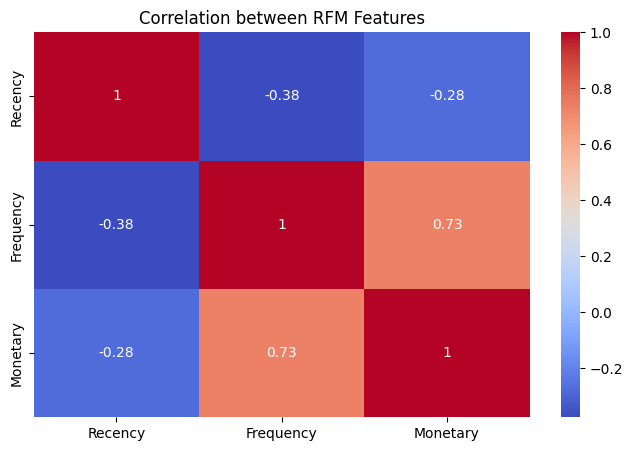

In [158]:
plt.figure(figsize=(8, 5))
sns.heatmap(customer_df[['Recency', 'Frequency', 'Monetary']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation between RFM Features')
plt.show()

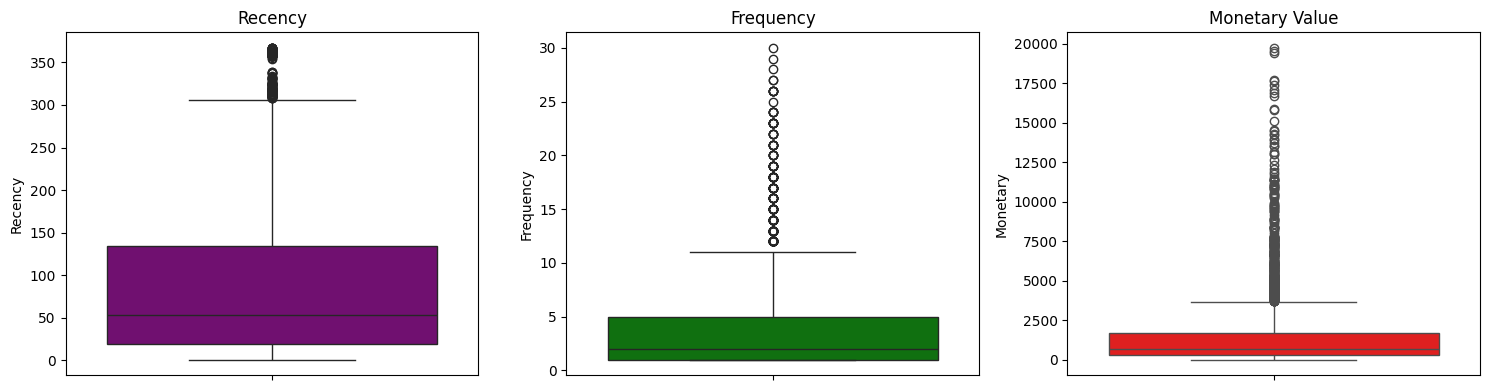

In [159]:
plt.figure(figsize=(15, 4))

plt.subplot(1, 3, 1)
sns.boxplot(y=customer_df['Recency'], color='purple')
plt.title('Recency')

plt.subplot(1, 3, 2)
sns.boxplot(y=customer_df['Frequency'], color='green')
plt.title('Frequency')

plt.subplot(1, 3, 3)
sns.boxplot(y=customer_df['Monetary'], color='red')
plt.title('Monetary Value')

plt.tight_layout()
plt.show()

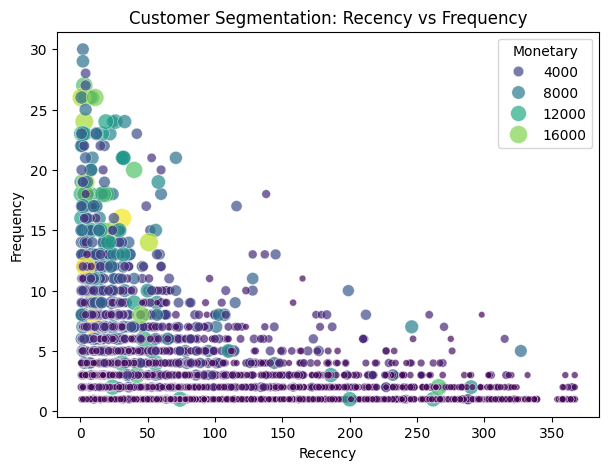

In [160]:
plt.figure(figsize=(7, 5))
sns.scatterplot(data=customer_df, x='Recency', y='Frequency', size='Monetary', hue='Monetary', palette='viridis', sizes=(20, 200), alpha=0.7)
plt.title('Customer Segmentation: Recency vs Frequency')
plt.show()

In [161]:
# Encode Country as numeric
df['Country_Code'] = df['Country'].astype('category').cat.codes
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,TotalPrice,InvoiceMonth,Country_Code
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,83.4,2009-12,34
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0,2009-12,34
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0,2009-12,34
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,100.8,2009-12,34
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,30.0,2009-12,34


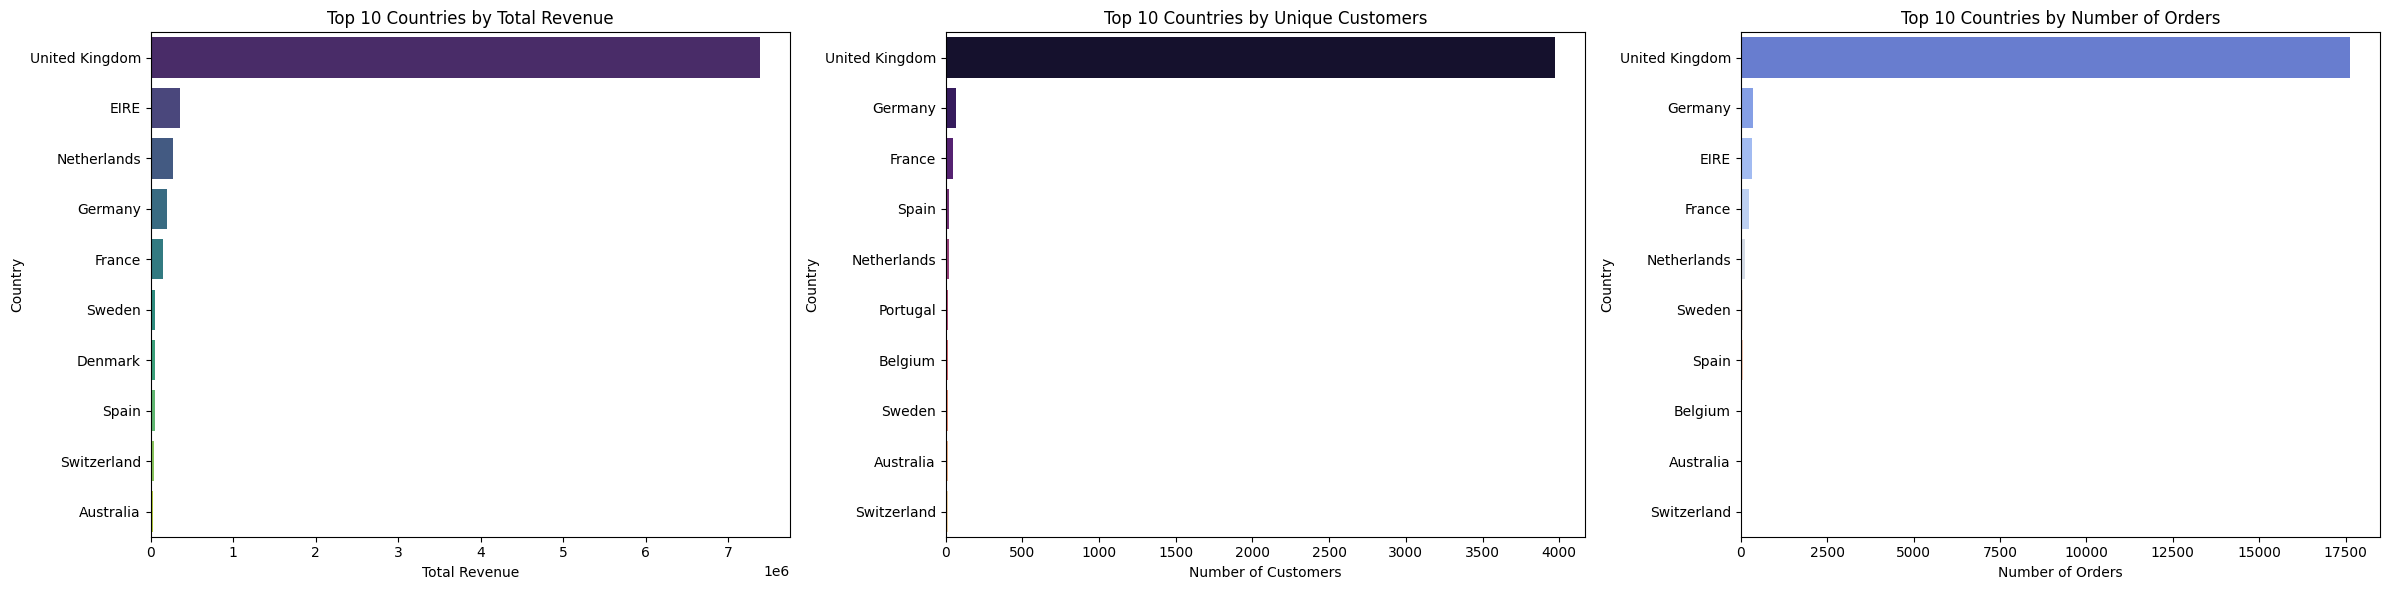

In [162]:
# Grouped data
country_revenue = df.groupby('Country')['TotalPrice'].sum().sort_values(ascending=False)
country_customers = df.groupby('Country')['Customer ID'].nunique().sort_values(ascending=False)
country_orders = df.groupby('Country')['Invoice'].nunique().sort_values(ascending=False)

# Create subplots: 1 row, 3 columns
fig, axes = plt.subplots(1, 3, figsize=(24, 6))

# Plot 1: Total Revenue
sns.barplot(
    x=country_revenue.head(10).values,
    y=country_revenue.head(10).index,
    palette='viridis',
    ax=axes[0]
)
axes[0].set_title("Top 10 Countries by Total Revenue")
axes[0].set_xlabel("Total Revenue")
axes[0].set_ylabel("Country")

# Plot 2: Unique Customers
sns.barplot(
    x=country_customers.head(10).values,
    y=country_customers.head(10).index,
    palette='magma',
    ax=axes[1]
)
axes[1].set_title("Top 10 Countries by Unique Customers")
axes[1].set_xlabel("Number of Customers")
axes[1].set_ylabel("Country")

# Plot 3: Number of Orders
sns.barplot(
    x=country_orders.head(10).values,
    y=country_orders.head(10).index,
    palette='coolwarm',
    ax=axes[2]
)
axes[2].set_title("Top 10 Countries by Number of Orders")
axes[2].set_xlabel("Number of Orders")
axes[2].set_ylabel("Country")

# Adjust layout
plt.tight_layout()
plt.show()

In [163]:
# Build feature set
transaction_counts = df.groupby('Customer ID')['Invoice'].nunique().rename('TotalTransactions')
total_quantity = df.groupby('Customer ID')['Quantity'].sum().rename('TotalQuantity')
avg_quantity = df.groupby('Customer ID')['Quantity'].mean().rename('AvgQuantityPerPurchase')
avg_basket_value = df.groupby('Customer ID')['TotalPrice'].mean().rename('AvgBasketValue')
purchase_days = df.groupby('Customer ID')['InvoiceDate'].apply(lambda x: x.sort_values().diff().dt.days.mean()).rename('AvgDaysBetweenPurchases')
latest_country = df.groupby('Customer ID')['Country_Code'].last().rename('CountryCode')

# Combine into one DataFrame
additional_features = pd.concat([
    transaction_counts,
    total_quantity,
    avg_quantity,
    avg_basket_value,
    purchase_days,
    latest_country
], axis=1).reset_index().rename(columns={'Customer ID': 'CustomerID'})


In [164]:
customer_df = customer_df.merge(additional_features, on='CustomerID', how='left')

In [174]:
# Fill missing values
customer_df['AvgDaysBetweenPurchases'].fillna(customer_df['AvgDaysBetweenPurchases'].median(), inplace=True)

In [175]:
customer_df.head()

,CustomerID,Recency,Frequency,Monetary,TotalTransactions,TotalQuantity,AvgQuantityPerPurchase,AvgBasketValue,AvgDaysBetweenPurchases,CountryCode
0,12346.0,165,11,372.86,11,70,2.121212,11.298788,6.000000,34
1,12347.0,3,2,1323.32,2,828,11.661972,18.638310,0.528571,14
2,12348.0,74,1,222.16,1,373,18.650000,11.108000,0.000000,10
3,12349.0,43,3,2671.14,3,993,9.735294,26.187647,1.782178,16
4,12351.0,11,1,300.93,1,261,12.428571,14.330000,0.000000,35


In [176]:
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4200 entries, 0 to 4199
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   CustomerID               4200 non-null   float64
 1   Recency                  4200 non-null   int64  
 2   Frequency                4200 non-null   int64  
 3   Monetary                 4200 non-null   float64
 4   TotalTransactions        4200 non-null   int64  
 5   TotalQuantity            4200 non-null   int64  
 6   AvgQuantityPerPurchase   4200 non-null   float64
 7   AvgBasketValue           4200 non-null   float64
 8   AvgDaysBetweenPurchases  4200 non-null   float64
 9   CountryCode              4200 non-null   int8   
dtypes: float64(5), int64(4), int8(1)
memory usage: 299.5 KB


In [177]:
# Define target (CLV)
target = 'Monetary'

# Define feature set (excluding ID and target)
features = customer_df.drop(columns=['CustomerID', 'Monetary'])

X = features
y = customer_df[target]


In [178]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [193]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [194]:
y_pred_rf = rf_model.predict(X_test)

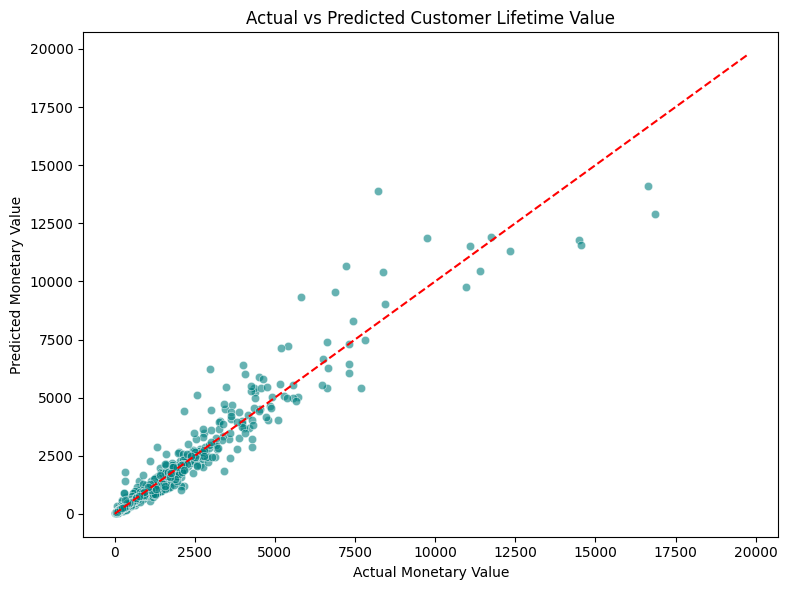

In [195]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred_rf, alpha=0.6, color='teal')
plt.plot([y.min(), y.max()], [y.min(), y.max()], '--r')
plt.xlabel("Actual Monetary Value")
plt.ylabel("Predicted Monetary Value")
plt.title("Actual vs Predicted Customer Lifetime Value")
plt.tight_layout()
plt.show()

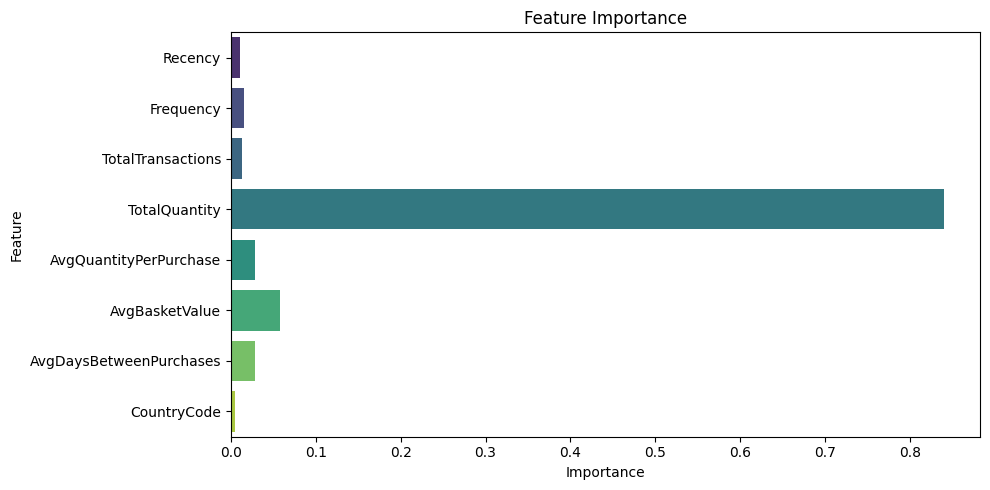

In [196]:
importances = rf_model.feature_importances_
feature_names = X.columns

plt.figure(figsize=(10, 5))
sns.barplot(x=importances, y=feature_names, palette='viridis')
plt.title("Feature Importance")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

In [198]:
import xgboost as xgb
xgb_model = xgb.XGBRegressor(
    objective='reg:squarederror',
    n_estimators=100,
    learning_rate=0.1,
    max_depth=5,
    random_state=42
)
xgb_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [199]:
y_pred_xgb = xgb_model.predict(X_test)

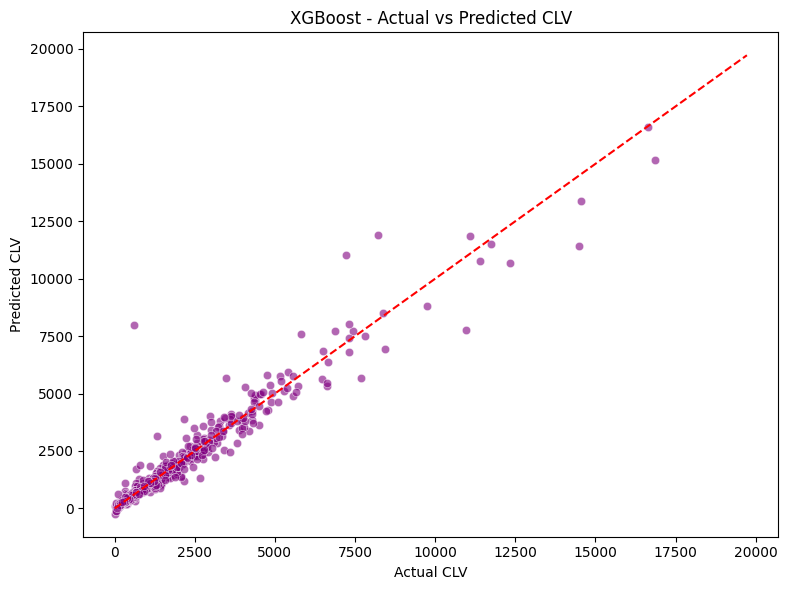

In [200]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred_xgb, alpha=0.6, color='purple')
plt.plot([y.min(), y.max()], [y.min(), y.max()], '--r')
plt.xlabel("Actual CLV")
plt.ylabel("Predicted CLV")
plt.title("XGBoost - Actual vs Predicted CLV")
plt.tight_layout()
plt.show()

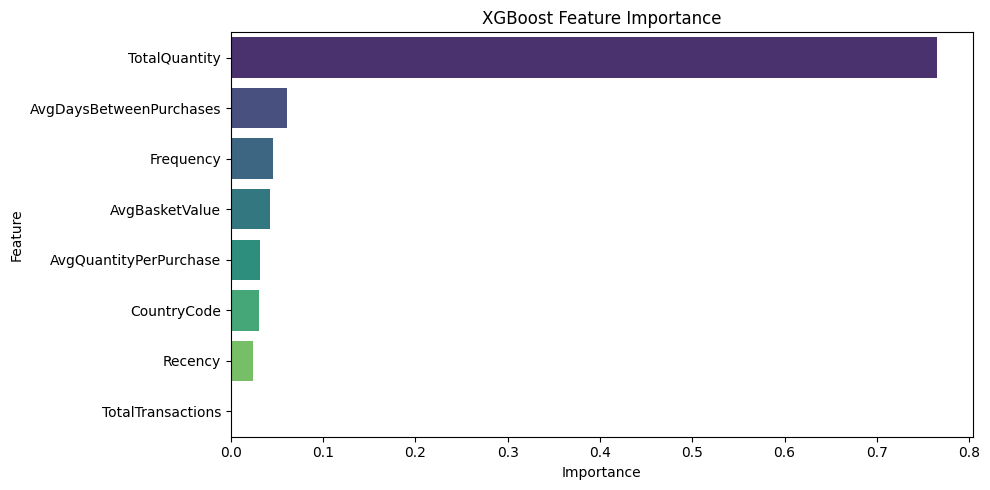

In [201]:
importances = xgb_model.feature_importances_
feature_names = X.columns

# Create a DataFrame for sorting
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Plot using seaborn
plt.figure(figsize=(10, 5))
sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')
plt.title("XGBoost Feature Importance")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()


In [206]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

results = pd.DataFrame({
    'Model': ['Random Forest', 'XGBoost'],
    'RMSE': [
        np.sqrt(mean_squared_error(y_test, y_pred_rf)),
        np.sqrt(mean_squared_error(y_test, y_pred_xgb))
    ],
    'MAE': [
        mean_absolute_error(y_test, y_pred_rf),
        mean_absolute_error(y_test, y_pred_xgb)
    ],
    'R2 Score': [
        r2_score(y_test, y_pred_rf),
        r2_score(y_test, y_pred_xgb)
    ]
})

print("Model Performance Comparison:\n")
print(results)

Model Performance Comparison:

           Model        RMSE         MAE  R2 Score
0  Random Forest  530.979796  222.718165  0.924807
1        XGBoost  462.657542  181.156166  0.942912


In [207]:
import joblib

joblib.dump(xgb_model, 'xgb_model.pkl')

['xgb_model.pkl']

In [208]:
from google.colab import files
files.download('xgb_model.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>